In [1]:
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
def score(confusion_matrix):
    sc = 10*confusion_matrix[0,1] + 500*confusion_matrix[1,0]
    return sc    
# 500 penalty for type1 error, 10 penalty for type2 error

In [3]:
train_features = pd.read_csv('./aps_failure_training_set.csv', na_values='na')
test_features =  pd.read_csv('./aps_failure_test_set.csv', na_values='na')

In [4]:
train_features.head()

class  aa_000  ab_000        ac_000  ad_000  ae_000  af_000  ag_000  ag_001  \
0   neg   76698     NaN  2.130706e+09   280.0     0.0     0.0     0.0     0.0   
1   neg   33058     NaN  0.000000e+00     NaN     0.0     0.0     0.0     0.0   
2   neg   41040     NaN  2.280000e+02   100.0     0.0     0.0     0.0     0.0   
3   neg      12     0.0  7.000000e+01    66.0     0.0    10.0     0.0     0.0   
4   neg   60874     NaN  1.368000e+03   458.0     0.0     0.0     0.0     0.0   

   ag_002   ...       ee_002    ee_003    ee_004    ee_005    ee_006  \
0     0.0   ...    1240520.0  493384.0  721044.0  469792.0  339156.0   
1     0.0   ...     421400.0  178064.0  293306.0  245416.0  133654.0   
2     0.0   ...     277378.0  159812.0  423992.0  409564.0  320746.0   
3     0.0   ...        240.0      46.0      58.0      44.0      10.0   
4     0.0   ...     622012.0  229790.0  405298.0  347188.0  286954.0   

     ee_007    ee_008  ee_009  ef_000  eg_000  
0  157956.0   73224.0     0.0     0.0     0.0  
1   81140.0   97576.0  1500.0     0.0     0.0  
2  158022.0   95128.0   514.0     0.0     0.0  
3       0.0       0.0     0.0     4.0    32.0  
4  311560.0  433954.0  1218.0     0.0     0.0  

[5 rows x 171 columns]

In [5]:
train_features=train_features.fillna(train_features.mean())
test_features=test_features.fillna(test_features.mean())

In [6]:
print(train_features.shape, test_features.shape)

(60000, 171) (16000, 171)


In [7]:
# make decision tree first. It is for explanation
dt = DecisionTreeClassifier(max_depth=5)

In [8]:
dt.fit(train_features.drop('class', axis=1), train_features['class'])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

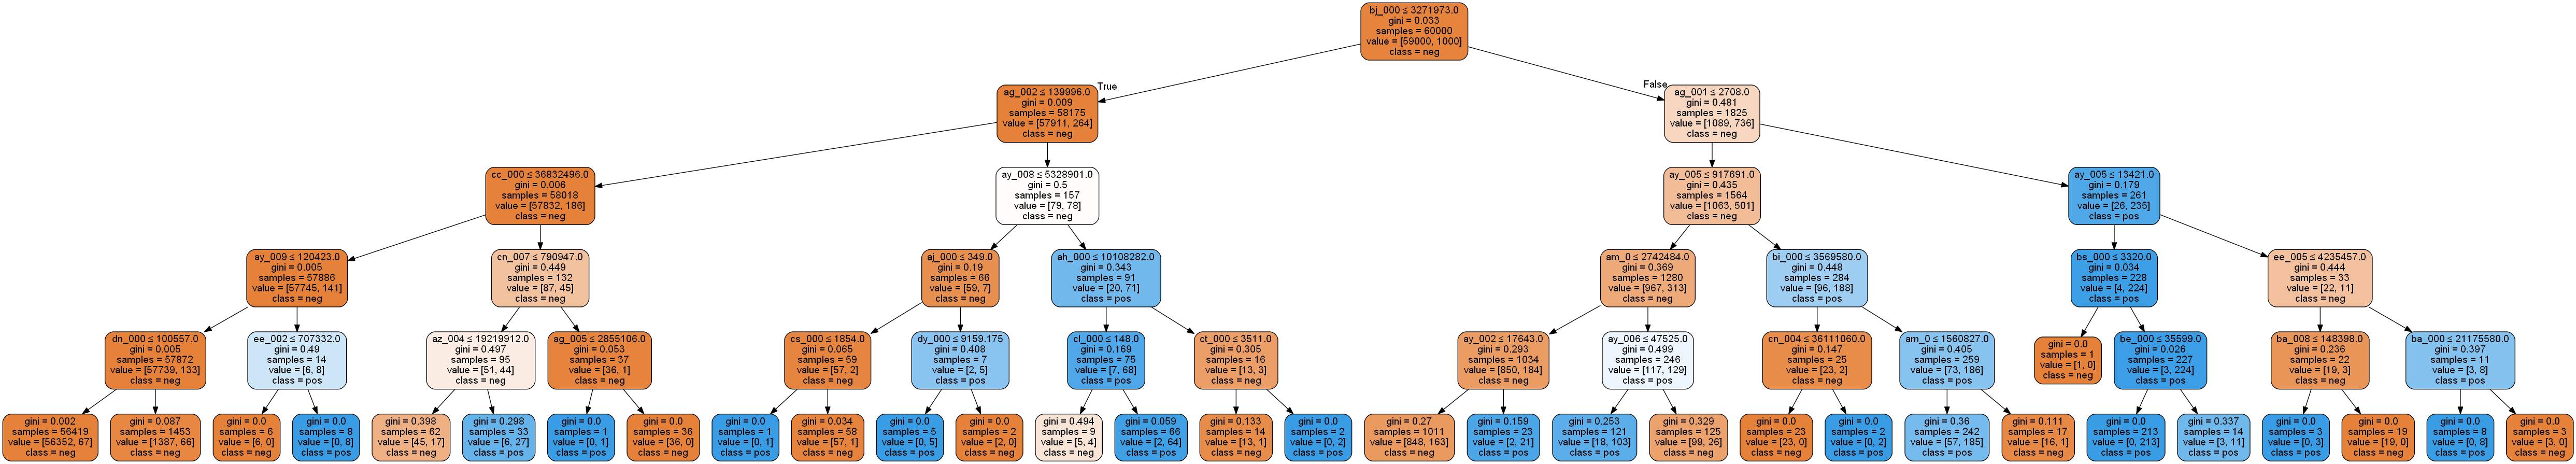

In [11]:
import pydotplus
from IPython.display import Image  
from sklearn.tree import export_graphviz

dot_data = export_graphviz(dt, out_file=None, feature_names=train_features.columns[1:],
                          class_names=pd.unique(train_features['class']), filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [12]:
dtPred = dt.predict(test_features.drop('class', axis=1))

In [13]:
dt_cm = confusion_matrix(test_features['class'], dtPred)

In [14]:
dt_cm

array([[15591,    34],
       [  157,   218]], dtype=int64)

In [15]:
score(dt_cm)

78840

In [15]:
# randomforest before data augmentation
rf = RandomForestClassifier(n_estimators=100, max_depth=6, random_state=123)

rf.fit(train_features.drop('class', axis=1), train_features['class'])

rf.feature_importances_

array([2.38774495e-02, 2.38887157e-04, 5.82919123e-04, 6.38383035e-04,
       6.61238335e-05, 2.16937512e-04, 6.90150801e-04, 2.37758781e-02,
       3.97931717e-02, 3.77887568e-02, 5.46232518e-03, 1.41646652e-03,
       5.10836026e-03, 2.56675157e-03, 5.79699330e-04, 9.86022992e-04,
       1.04895737e-02, 7.04174340e-03, 5.51922280e-04, 2.05312930e-04,
       2.92444918e-02, 2.64729408e-02, 6.75315425e-03, 1.87831696e-03,
       2.52682695e-02, 5.76318588e-02, 9.20143533e-04, 4.73913928e-04,
       1.14283112e-03, 6.41185779e-04, 7.28506367e-04, 5.72466867e-04,
       3.94036015e-03, 4.16507631e-03, 3.29754672e-03, 3.58261456e-03,
       4.67312891e-03, 1.79803818e-02, 9.75998795e-03, 3.39225562e-03,
       6.83913052e-03, 1.19864929e-02, 3.28386858e-03, 6.42431637e-03,
       5.43719804e-03, 2.02204043e-03, 1.75870840e-03, 1.58500518e-03,
       4.98812208e-04, 2.60863007e-03, 2.53600555e-04, 1.67746076e-04,
       2.81195015e-03, 6.42740748e-03, 3.82680696e-03, 1.76468265e-03,
      

[Text(0,0.5,'Feature')]

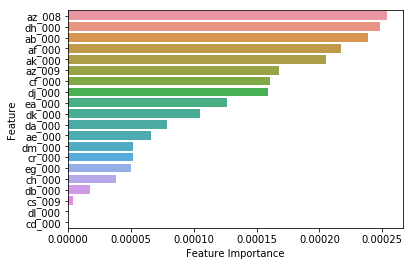

In [66]:
importances = rf.feature_importances_
indices = np.argsort(importances) # sort
good_features = indices[0:20] # top 20

top20_features=sns.barplot(x = importances[good_features][::-1], y = train_features.columns[1:][good_features][::-1])
top20_features.set(xlabel='Feature Importance')
top20_features.set(ylabel='Feature')

In [67]:
pred = rf.predict(test_features.drop('class', axis=1))
cm = confusion_matrix(test_features['class'], pred)
cm

array([[15609,    16],
       [  163,   212]], dtype=int64)

In [68]:
score(cm)

81660

## Augment positive data

In [7]:
pos_train = train_features[train_features['class']=='pos']
neg_train = train_features[train_features['class']=='neg']

In [8]:
pos_train.head()

class  aa_000    ab_000        ac_000         ad_000   ae_000     af_000  \
9     pos  153204  0.000000  1.820000e+02  190620.639314  0.00000   0.000000   
23    pos  453236  0.713189  2.926000e+03  190620.639314  0.00000   0.000000   
60    pos   72504  0.713189  1.594000e+03    1052.000000  0.00000   0.000000   
115   pos  762958  0.713189  3.560143e+08  190620.639314  6.81913  11.006817   
135   pos  695994  0.713189  3.560143e+08  190620.639314  6.81913  11.006817   

     ag_000    ag_001     ag_002    ...           ee_002        ee_003  \
9       0.0       0.0        0.0    ...     1.298620e+05  2.687200e+04   
23      0.0       0.0      222.0    ...     7.908038e+06  3.026002e+06   
60      0.0     244.0   178226.0    ...     1.432098e+06  3.722520e+05   
115   776.0  281128.0  2186308.0    ...     4.454897e+05  2.111264e+05   
135     0.0       0.0        0.0    ...     1.397742e+06  4.955440e+05   

           ee_004        ee_005        ee_006         ee_007         ee_008  \
9    3.404400e+04  2.247200e+04  3.436200e+04       0.000000       0.000000   
23   5.025350e+06  2.025766e+06  1.160638e+06  533834.000000  493800.000000   
60   5.275140e+05  3.582740e+05  3.328180e+05  284178.000000    3742.000000   
115  4.457343e+05  3.939462e+05  3.330582e+05  346271.429824  138729.983179   
135  3.616460e+05  2.861000e+04  5.130000e+03     212.000000       0.000000   

          ee_009    ef_000    eg_000  
9       0.000000  0.000000  0.000000  
23   6914.000000  0.000000  0.000000  
60      0.000000  0.000000  0.000000  
115  8388.914629  0.090579  0.212756  
135     0.000000  0.090579  0.212756  

[5 rows x 171 columns]

In [9]:
neg_train.head()

class  aa_000    ab_000        ac_000         ad_000  ae_000  af_000  \
0   neg   76698  0.713189  2.130706e+09     280.000000     0.0     0.0   
1   neg   33058  0.713189  0.000000e+00  190620.639314     0.0     0.0   
2   neg   41040  0.713189  2.280000e+02     100.000000     0.0     0.0   
3   neg      12  0.000000  7.000000e+01      66.000000     0.0    10.0   
4   neg   60874  0.713189  1.368000e+03     458.000000     0.0     0.0   

   ag_000  ag_001  ag_002   ...       ee_002    ee_003    ee_004    ee_005  \
0     0.0     0.0     0.0   ...    1240520.0  493384.0  721044.0  469792.0   
1     0.0     0.0     0.0   ...     421400.0  178064.0  293306.0  245416.0   
2     0.0     0.0     0.0   ...     277378.0  159812.0  423992.0  409564.0   
3     0.0     0.0     0.0   ...        240.0      46.0      58.0      44.0   
4     0.0     0.0     0.0   ...     622012.0  229790.0  405298.0  347188.0   

     ee_006    ee_007    ee_008  ee_009  ef_000  eg_000  
0  339156.0  157956.0   73224.0     0.0     0.0     0.0  
1  133654.0   81140.0   97576.0  1500.0     0.0     0.0  
2  320746.0  158022.0   95128.0   514.0     0.0     0.0  
3      10.0       0.0       0.0     0.0     4.0    32.0  
4  286954.0  311560.0  433954.0  1218.0     0.0     0.0  

[5 rows x 171 columns]

In [10]:
print(pos_train.shape, neg_train.shape)

(1000, 171) (59000, 171)


In [11]:
augmented_pos_train = pos_train.copy()

In [12]:
for i in range(95):
    augmented_pos_train = augmented_pos_train.append(pos_train, ignore_index=True)
augmented_pos_train.shape

(96000, 171)

In [13]:
augmented_train = augmented_pos_train.append(neg_train, ignore_index=True)
augmented_train.shape

(155000, 171)

In [14]:
augmented_train_label = augmented_train['class']
#augmented_train_label = pd.DataFrame(augmented_train_label)
augmented_train_features = augmented_train.drop('class', axis=1)
test_label = test_features['class']
#test_label = pd.DataFrame(test_label)
test_features2 = test_features.drop('class', axis=1)

In [15]:
test_label.head()

0    neg
1    neg
2    neg
3    neg
4    neg
Name: class, dtype: object

In [16]:
train_features['class'].value_counts()

neg    59000
pos     1000
Name: class, dtype: int64

In [17]:
augmented_train_label.value_counts()

pos    96000
neg    59000
Name: class, dtype: int64

In [18]:
test_label.value_counts()

neg    15625
pos      375
Name: class, dtype: int64

In [35]:
rf = RandomForestClassifier(n_estimators=100, max_depth=6, random_state=123)

In [36]:
rf.fit(augmented_train_features, augmented_train_label)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=123, verbose=0, warm_start=False)

In [37]:
rf.feature_importances_

array([6.87202249e-02, 4.81054488e-06, 1.93556131e-04, 1.43098573e-04,
       7.13385776e-05, 5.51297824e-05, 5.25525945e-05, 4.38346830e-04,
       2.60646033e-03, 4.83839617e-03, 1.02932279e-02, 1.40928087e-02,
       5.31332027e-04, 3.80124399e-04, 3.36226965e-04, 1.34336636e-04,
       2.45011956e-02, 2.51645929e-03, 5.30718337e-04, 2.44598467e-05,
       2.86950180e-03, 6.33627672e-03, 1.76385630e-02, 1.79933660e-03,
       5.40817540e-02, 3.94815463e-02, 3.45569708e-04, 1.77366653e-04,
       8.84781869e-05, 3.95592236e-04, 1.97010068e-04, 4.60179810e-04,
       4.26014178e-04, 2.10291786e-04, 4.45240177e-04, 6.34624285e-04,
       2.57502914e-04, 2.49821517e-04, 1.13180004e-03, 8.67961409e-04,
       2.94869067e-03, 2.28343017e-04, 3.13142981e-03, 7.86551962e-03,
       2.95755922e-03, 9.54616620e-04, 4.30891984e-04, 9.72467476e-04,
       2.75828248e-04, 9.12283714e-05, 2.24506160e-04, 2.07902285e-06,
       2.63395746e-03, 9.67949535e-03, 5.63790300e-03, 2.68590977e-03,
      

In [38]:
importances = rf.feature_importances_
indices = np.argsort(importances) # sort
good_features = indices[0:20] # top 20

Text(0.5,0,'Relative Importance')

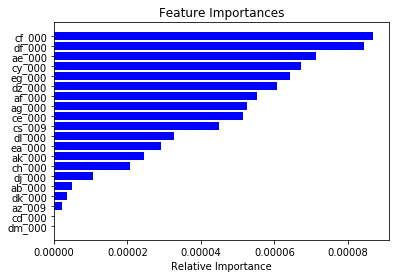

In [39]:
plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(good_features)), importances[good_features], color='b', align='center')
plt.yticks(range(len(good_features)), augmented_train_features.columns[good_features])
plt.xlabel('Relative Importance')

[Text(0,0.5,'Feature')]

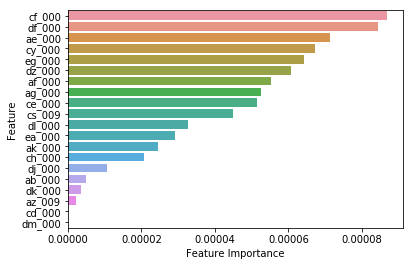

In [40]:
top20_features=sns.barplot(x = importances[good_features][::-1], y = augmented_train_features.columns[good_features][::-1])
top20_features.set(xlabel='Feature Importance')
top20_features.set(ylabel='Feature')

In [41]:
pred = rf.predict(test_features2)

In [42]:
cm = confusion_matrix(test_label, pred)
#sns.heatmap(cm, annot=True)

In [43]:
cm

array([[14946,   679],
       [    9,   366]], dtype=int64)

In [44]:
score(cm)

11290

## Optimized  # of trees and depths

##### It is better to do cv. But I'll do it directly to test set (Never Recommend it!!)

In [19]:
random_state = 123
best_combi = (0, 0)
second_combi = (0, 0)
third_combi = (0, 0)
best_score = 1000000000000

In [26]:
for tree_num in range(30, 151, 20): # my labtop is not powerful to cover all tree_numbers and max_tree_depths, so used small samples
    print('#:', tree_num, '=============')  # if you want more various samples, just change parameters
    for tree_depth in range(4, 7): 
        rf = RandomForestClassifier(n_estimators=tree_num, max_depth=tree_depth, random_state=random_state)
        rf.fit(augmented_train_features, augmented_train_label)
        pred = rf.predict(test_features2)
        cm = confusion_matrix(test_label, pred)
        score_on = score(cm)
        if score_on < best_score:
            third_combi = second_combi
            second_combi = best_combi
            best_combi = (tree_num, tree_depth)
            best_score = score_on
        print('depth:',tree_depth, '\tscore:', score_on)

#: 30 =============
depth: 4 	score: 12160
depth: 5 	score: 11490
depth: 6 	score: 12660
#: 50 =============
depth: 4 	score: 12260
depth: 5 	score: 10850
depth: 6 	score: 11140
#: 70 =============
depth: 4 	score: 12190
depth: 5 	score: 11410
depth: 6 	score: 11290
#: 90 =============
depth: 4 	score: 12190
depth: 5 	score: 11430
depth: 6 	score: 11780
#: 110 =============
depth: 4 	score: 12190
depth: 5 	score: 11510
depth: 6 	score: 11770
#: 130 =============
depth: 4 	score: 12210
depth: 5 	score: 11490
depth: 6 	score: 11670
#: 150 =============
depth: 4 	score: 12280
depth: 5 	score: 11530
depth: 6 	score: 12690


In [27]:
best_combi

(50, 5)

In [28]:
best_score

10850

In [29]:
second_combi # second_combi and third_combi are not accurate, but just greedy way

(40, 5)

In [30]:
third_combi

(30, 5)

## Big # of trees (require good computing power... and in conclusion, they are unnecessary)

In [32]:
for tree_num in range(100, 1001, 300): 
    print('#:', tree_num, '=============') 
    for tree_depth in range(4, 7): 
        rf = RandomForestClassifier(n_estimators=tree_num, max_depth=tree_depth, random_state=random_state)
        rf.fit(augmented_train_features, augmented_train_label)
        pred = rf.predict(test_features2)
        cm = confusion_matrix(test_label, pred)
        score_on = score(cm)
        if score_on < best_score:
            third_combi = second_combi
            second_combi = best_combi
            best_combi = (tree_num, tree_depth)
            best_score = score_on
        print('depth:',tree_depth, '\tscore:', score_on)
        

#: 100 =============
depth: 4 	score: 12180
depth: 5 	score: 11440
depth: 6 	score: 11290
#: 400 =============
depth: 4 	score: 12280
depth: 5 	score: 11460
depth: 6 	score: 12250
#: 700 =============
depth: 4 	score: 12220
depth: 5 	score: 11340
depth: 6 	score: 12290
#: 1000 =============
depth: 4 	score: 12250
depth: 5 	score: 11370
depth: 6 	score: 12810


In [33]:
best_combi

(50, 5)

In [34]:
best_score

10850

In [35]:
second_combi

(40, 5)

In [36]:
third_combi

(30, 5)

## endgame